In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import datetime

## Step 1

In [2]:
# Download historical data from 2012-01-01 to 2022-12-31, using only the Adj Close price
start = "2012-01-01"
end = "2022-12-31"
etf = ["SPY","TLT","SHY","GLD","DBO"]

In [3]:
df = yf.download(etf, start, end)["Adj Close"]


[*********************100%***********************]  5 of 5 completed


In [4]:
df.head()

Ticker                           DBO         GLD        SHY         SPY  \
Date                                                                      
2012-01-03 00:00:00+00:00  27.302017  155.919998  71.879860  101.091980   
2012-01-04 00:00:00+00:00  27.430843  156.710007  71.888405  101.250519   
2012-01-05 00:00:00+00:00  27.062767  157.779999  71.896927  101.520103   
2012-01-06 00:00:00+00:00  27.173189  157.199997  71.888405  101.258469   
2012-01-09 00:00:00+00:00  27.081171  156.500000  71.905457  101.504257   

Ticker                           TLT  
Date                                  
2012-01-03 00:00:00+00:00  85.716888  
2012-01-04 00:00:00+00:00  84.697678  
2012-01-05 00:00:00+00:00  84.547066  
2012-01-06 00:00:00+00:00  85.214455  
2012-01-09 00:00:00+00:00  85.063736

In [5]:
df.describe()

Ticker          DBO          GLD          SHY          SPY          TLT
count   2768.000000  2768.000000  2768.000000  2768.000000  2768.000000
mean      14.222563   138.611351    74.770275   236.197772   105.713975
std        7.025522    23.276570     2.643632    96.091233    18.415907
min        4.941839   100.500000    71.706070   101.091980    76.310318
25%        8.619708   119.495001    72.581078   164.654022    92.115372
50%       11.187733   127.550003    73.699085   215.421051   102.285572
75%       22.204168   162.070007    76.872814   291.376404   115.536785
max       29.335634   193.889999    79.681801   458.720276   153.022964

In [6]:
# Get daily returns
df2 = df.pct_change().dropna()
df2.head()

Ticker                          DBO       GLD       SHY       SPY       TLT
Date                                                                       
2012-01-04 00:00:00+00:00  0.004719  0.005067  0.000119  0.001568 -0.011890
2012-01-05 00:00:00+00:00 -0.013418  0.006828  0.000119  0.002663 -0.001778
2012-01-06 00:00:00+00:00  0.004080 -0.003676 -0.000119 -0.002577  0.007894
2012-01-09 00:00:00+00:00 -0.003386 -0.004453  0.000237  0.002427 -0.001769
2012-01-10 00:00:00+00:00  0.005097  0.013674  0.000118  0.008670 -0.001688

In [7]:
df2.describe()

Ticker          DBO          GLD          SHY          SPY          TLT
count   2767.000000  2767.000000  2767.000000  2767.000000  2767.000000
mean      -0.000037     0.000076     0.000020     0.000530     0.000070
std        0.019416     0.009498     0.000698     0.010717     0.009098
min       -0.166453    -0.087808    -0.005088    -0.109424    -0.066683
25%       -0.009449    -0.004833    -0.000243    -0.003584    -0.005284
50%        0.001282     0.000341     0.000000     0.000598     0.000493
75%        0.010254     0.004972     0.000350     0.005496     0.005498
max        0.106227     0.049038     0.005452     0.090603     0.075196

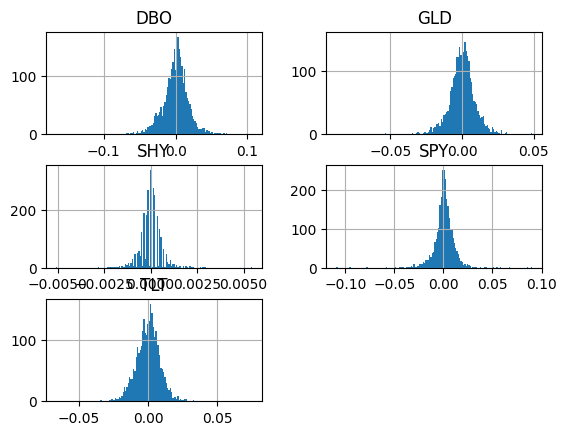

In [8]:
#Examine the histograms of the ETF returns
df2.hist(bins=150);

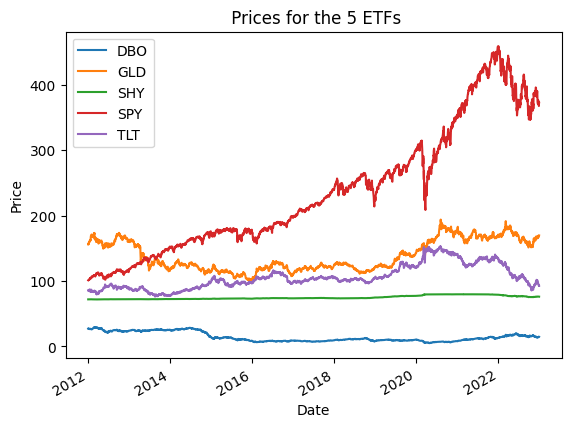

In [9]:
#Plot prices of the ETFs
df.plot()
plt.title(" Prices for the 5 ETFs")
plt.ylabel("Price")
plt.legend();

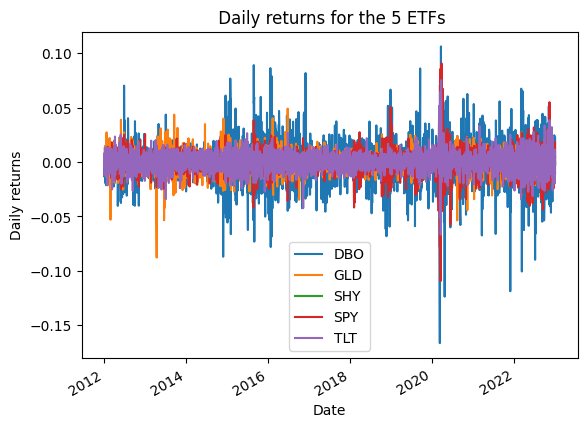

In [10]:
# Plot daily price returns of the ETFs
df2.plot()
plt.title(" Daily returns for the 5 ETFs")
plt.ylabel("Daily returns")
plt.legend();

In [11]:
# Check stationarity for ETF prices
for i in etf:
  adf_df = adfuller(df[i])
  print(f"ADF statistic for ETF {i}: {adf_df[0]:.3f}")
  print(f"p-value : {adf_df[1]:.3f}")
  if adf_df[1] <= 0.05:
    print(f"ETF {i} price data is stationary \n")
  else:
    print(f"ETF {i} price data is non-stationary \n")

ADF statistic for ETF SPY: -0.591
p-value : 0.873
ETF SPY price data is non-stationary 

ADF statistic for ETF TLT: -1.561
p-value : 0.503
ETF TLT price data is non-stationary 

ADF statistic for ETF SHY: -1.000
p-value : 0.753
ETF SHY price data is non-stationary 

ADF statistic for ETF GLD: -1.338
p-value : 0.612
ETF GLD price data is non-stationary 

ADF statistic for ETF DBO: -1.884
p-value : 0.340
ETF DBO price data is non-stationary 



In [12]:
# Check stationarity for ETF returns
for i in etf:
  adf_df2 = adfuller(df2[i])
  print(f"ADF statistic for ETF {i}: {adf_df2[0]:.3f}")
  print(f"p-value : {adf_df2[1]:.3f}")
  if adf_df2[1] <= 0.05:
    print(f"ETF {i} price data is stationary\n")
  else:
    print(f"ETF {i} price data is non-stationary\n")

ADF statistic for ETF SPY: -11.196
p-value : 0.000
ETF SPY price data is stationary

ADF statistic for ETF TLT: -9.777
p-value : 0.000
ETF TLT price data is stationary

ADF statistic for ETF SHY: -10.135
p-value : 0.000
ETF SHY price data is stationary

ADF statistic for ETF GLD: -52.541
p-value : 0.000
ETF GLD price data is stationary

ADF statistic for ETF DBO: -55.759
p-value : 0.000
ETF DBO price data is stationary



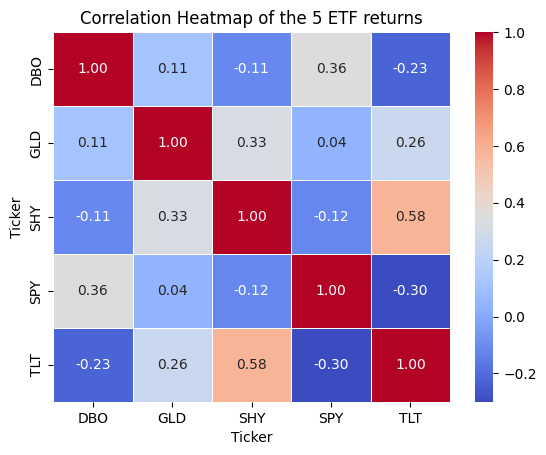

In [13]:
#Correlation matrix of the 5 ETF returns
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the 5 ETF returns')
plt.show()

In [14]:
#Reset index
df2.reset_index(inplace=True)
df2.head()

Ticker                      Date       DBO       GLD       SHY       SPY  \
0      2012-01-04 00:00:00+00:00  0.004719  0.005067  0.000119  0.001568   
1      2012-01-05 00:00:00+00:00 -0.013418  0.006828  0.000119  0.002663   
2      2012-01-06 00:00:00+00:00  0.004080 -0.003676 -0.000119 -0.002577   
3      2012-01-09 00:00:00+00:00 -0.003386 -0.004453  0.000237  0.002427   
4      2012-01-10 00:00:00+00:00  0.005097  0.013674  0.000118  0.008670   

Ticker       TLT  
0      -0.011890  
1      -0.001778  
2       0.007894  
3      -0.001769  
4      -0.001688

In [15]:
df2["year"] = df2["Date"].dt.year
df2["month"] = df2["Date"].dt.month
df2["day"] = df2["Date"].dt.day
df2["week"] = df2["Date"].dt.isocalendar().week
df2["weekday"] = df2["Date"].dt.weekday

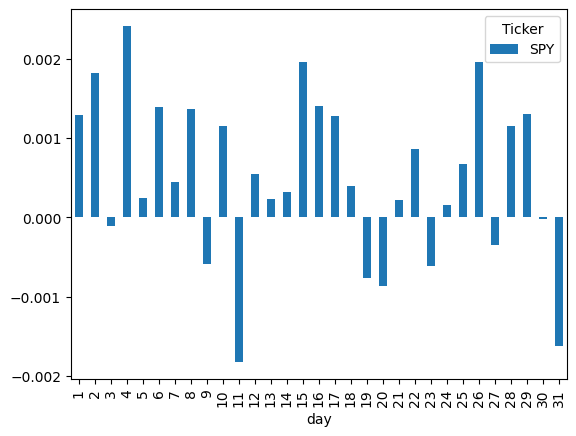

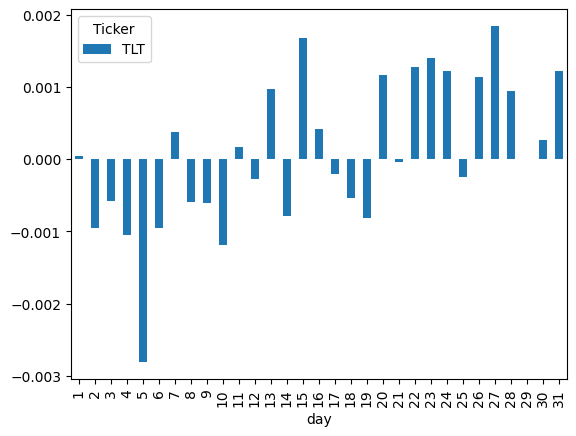

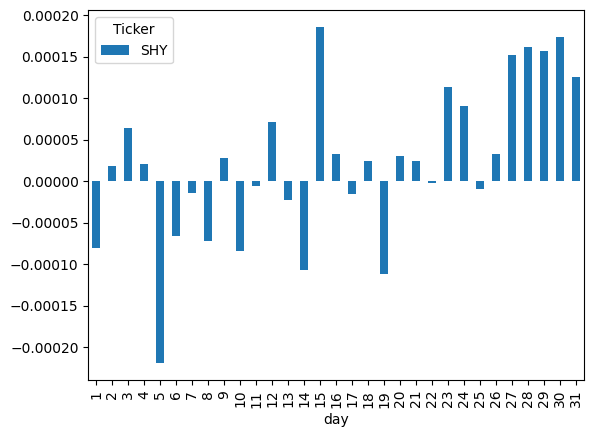

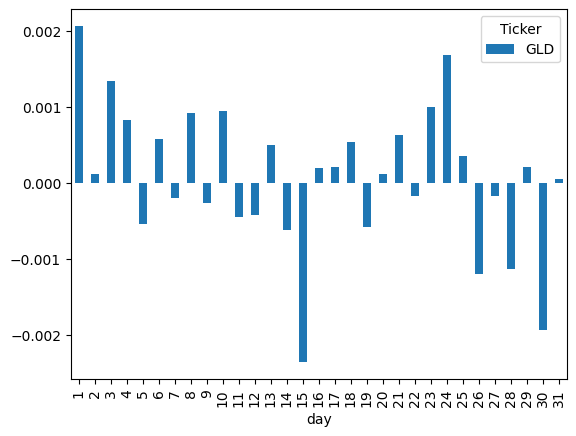

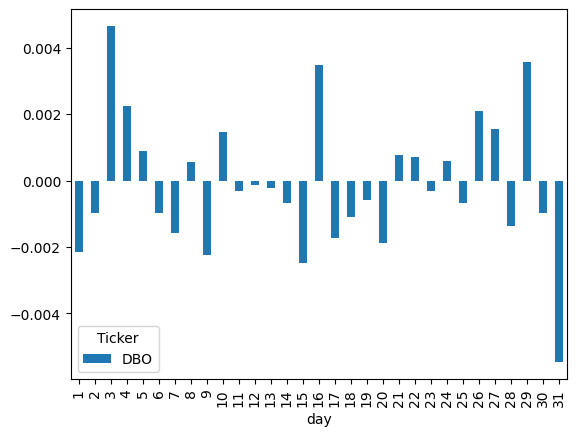

In [16]:
#Examine average returns during the different days
for i in etf:
  df2_day = df2[[i, "day"]]
  df2_day.groupby(by="day").mean().plot(kind="bar")

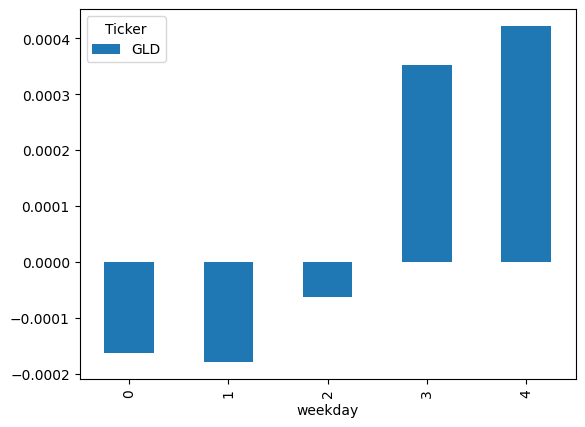

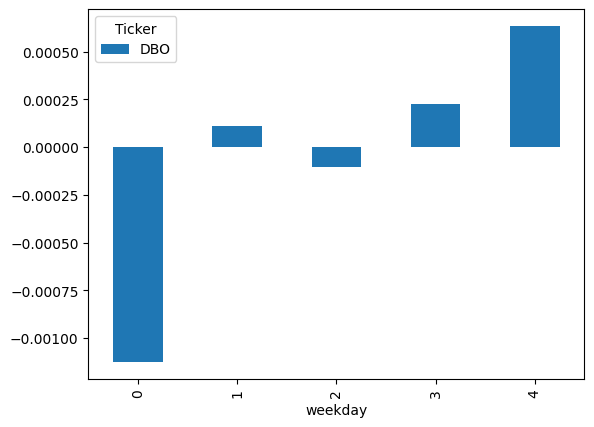

In [17]:
#Examine average returns during the different weekdays
for i in etf:
  df2_weekday = df2[[i, "weekday"]]
  df2_weekday.groupby(by="weekday").mean().plot(kind="bar")

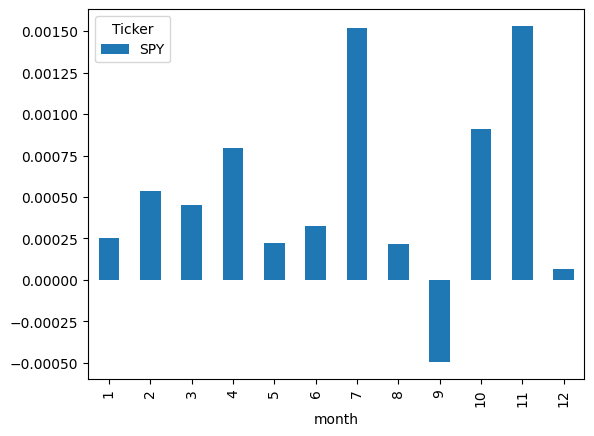

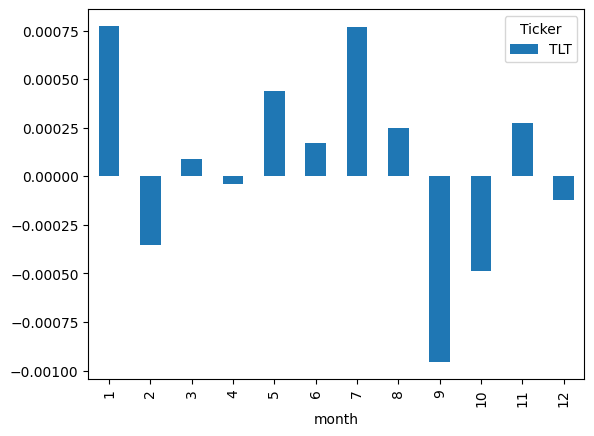

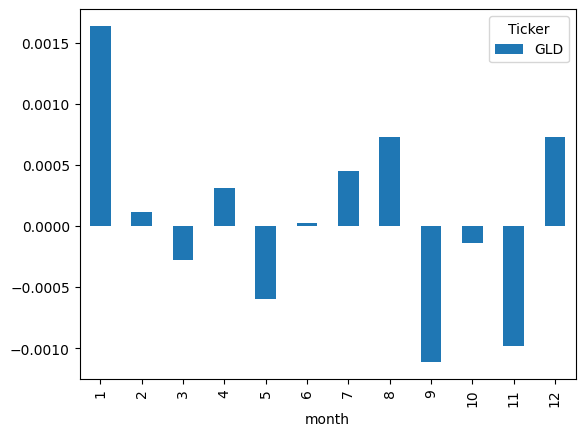

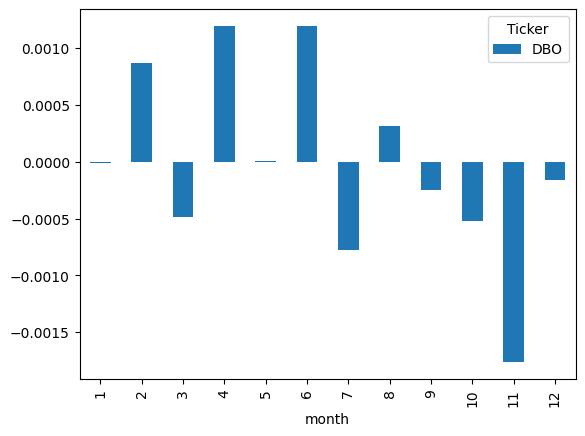

In [18]:
#Examine average returns during the different months
for i in etf:
  df2_month = df2[[i, "month"]]
  df2_month.groupby(by="month").mean().plot(kind="bar")

#Step 2

**Get Data**

In [19]:
import yfinance as yf
import pandas as pd

# Define ETF symbols
symbols = ["SPY", "TLT", "SHY", "GLD", "DBO"]

# Define date range
start_date = "2012-01-01"
end_date = "2022-12-31"

# Download data
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Display the data
print(data.head())


[*********************100%***********************]  5 of 5 completed

Ticker                           DBO         GLD        SHY         SPY  \
Date                                                                      
2012-01-03 00:00:00+00:00  27.302017  155.919998  71.879860  101.091980   
2012-01-04 00:00:00+00:00  27.430843  156.710007  71.888405  101.250519   
2012-01-05 00:00:00+00:00  27.062767  157.779999  71.896927  101.520103   
2012-01-06 00:00:00+00:00  27.173189  157.199997  71.888405  101.258469   
2012-01-09 00:00:00+00:00  27.081171  156.500000  71.905457  101.504257   

Ticker                           TLT  
Date                                  
2012-01-03 00:00:00+00:00  85.716888  
2012-01-04 00:00:00+00:00  84.697678  
2012-01-05 00:00:00+00:00  84.547066  
2012-01-06 00:00:00+00:00  85.214455  
2012-01-09 00:00:00+00:00  85.063736  


**Split data**

In [20]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Define splits
train_start, train_end = "2012-01-01", "2016-12-31"
val_start, val_end = "2017-01-01", "2017-12-31"
test_start, test_end = "2018-01-01", "2022-12-31"

train_data = returns.loc[train_start:train_end]
val_data = returns.loc[val_start:val_end]
test_data = returns.loc[test_start:test_end]

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")


Training data shape: (1257, 5)
Validation data shape: (251, 5)
Test data shape: (1259, 5)


**Build LSTM Models**

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Define LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)  # Predict 25-day ahead return
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Preprocessing for LSTM
window_size = 30  # Look-back period
future_target = 25  # Prediction horizon
scaler = MinMaxScaler()

def prepare_lstm_data(data, window_size, future_target):
    data_scaled = scaler.fit_transform(data.values.reshape(-1,1))
    X, y = [], []
    for i in range(len(data_scaled) - window_size - future_target):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size + future_target - 1])
    return np.array(X), np.array(y)

# Train and evaluate models for each ETF
models = {}
for symbol in symbols:
    print(f"Processing {symbol}...")
    X_train, y_train = prepare_lstm_data(train_data[symbol], window_size, future_target)
    X_val, y_val = prepare_lstm_data(val_data[symbol], window_size, future_target)
    model = create_lstm_model(X_train.shape[1:])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
    models[symbol] = model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Processing SPY...
Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1079 - val_loss: 0.0176
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0140 - val_loss: 0.0187
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0124 - val_loss: 0.0187
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0143 - val_loss: 0.0192
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0125 - val_loss: 0.0180
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0135 - val_loss: 0.0203
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0130 - val_loss: 0.0179
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0120 - val_loss: 0.0184
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0126 - val_loss: 0.0199
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0127 - val_loss: 0.0190
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0119 - val_loss: 0.0176
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31m

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.1291 - val_loss: 0.0340
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0207 - val_loss: 0.0328
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0206 - val_loss: 0.0328
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0214 - val_loss: 0.0328
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0188 - val_loss: 0.0328
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0174 - val_loss: 0.0332
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0187 - val_loss: 0.0328
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0179 - val_loss: 0.0344
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0167 - val_loss: 0.0347
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0172 - val_loss: 0.0334
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0179 - val_loss: 0.0334
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0171 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0692 - val_loss: 0.0166
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0130 - val_loss: 0.0164
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0156 - val_loss: 0.0171
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0141 - val_loss: 0.0165
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0123 - val_loss: 0.0162
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0139 - val_loss: 0.0162
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0128 - val_loss: 0.0182
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0126 - val_loss: 0.0171
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0128 - val_loss: 0.0168
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0124 - val_loss: 0.0165
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0119 - val_loss: 0.0178
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0131 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0845 - val_loss: 0.0302
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0101 - val_loss: 0.0327
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0091 - val_loss: 0.0342
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0104 - val_loss: 0.0314
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0090 - val_loss: 0.0332
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0084 - val_loss: 0.0318
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0080 - val_loss: 0.0343
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0097 - val_loss: 0.0310
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0091 - val_loss: 0.0316
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0085 - val_loss: 0.0336
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0080 - val_loss: 0.0368
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0959 - val_loss: 0.0258
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0139 - val_loss: 0.0273
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0140 - val_loss: 0.0289
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - val_loss: 0.0259
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0123 - val_loss: 0.0259
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0138 - val_loss: 0.0317
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0121 - val_loss: 0.0266
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0120 - val_loss: 0.0265
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0135 - val_loss: 0.0314
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0120 - val_loss: 0.0269
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - val_loss: 0.0292
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0136 - val_l

**EValuate model**

In [22]:
from sklearn.metrics import mean_squared_error

# Evaluate on test set
results = {}
for symbol in symbols:
    print(f"Evaluating {symbol}...")
    X_test, y_test = prepare_lstm_data(test_data[symbol], window_size, future_target)
    predictions = models[symbol].predict(X_test)
    test_mse = mean_squared_error(y_test, predictions)
    results[symbol] = test_mse

    X_train, y_train = prepare_lstm_data(train_data[symbol], window_size, future_target)
    predictions = models[symbol].predict(X_train)
    train_mse = mean_squared_error(y_train, predictions)
    results[symbol] = train_mse
    print(f"{symbol} train_mse: {train_mse}, test_mse: {test_mse}")

# from sklearn.metrics import mean_squared_error

# # Evaluate on test set
# results = {}
# for symbol in symbols:
#     print(f"Evaluating {symbol}...")
#     X_test, y_test = prepare_lstm_data(test_data[symbol], window_size, future_target)
#     predictions = models[symbol].predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     results[symbol] = mse
#     print(f"{symbol} Test MSE: {mse}")


Evaluating SPY...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
SPY train_mse: 0.010844051155826038, test_mse: 0.00608974426598305
Evaluating TLT...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
TLT train_mse: 0.014730152716288945, test_mse: 0.01357736830620187
Evaluating SHY...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
SHY train_mse: 0.011003537708342228, test_mse: 0.007192161590534573
Evaluating GLD...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
GLD train_mse: 0.005781562102503645, test_mse: 0.012231040440664288
Evaluating DBO...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
DBO train_mse: 0.010937855506332214, test_mse: 0.015643561362226693


Trading Strategy

In [23]:
# Trading strategy simulation with fixed slicing
portfolio_returns = []
long_positions = 2
short_positions = 2
rebalance_period = 25

for i in range(0, len(X_test), rebalance_period):
    # Ensure valid slicing
    start_idx = max(0, i)
    end_idx = min(i + rebalance_period, len(X_test))
    if start_idx >= len(X_test) or start_idx == end_idx:
        break

    # Predict returns for all ETFs
    preds = {symbol: models[symbol].predict(X_test[start_idx:end_idx])[-1, 0] for symbol in symbols}

    # Sort predictions to determine positions
    sorted_preds = sorted(preds.items(), key=lambda x: x[1], reverse=True)
    longs = [x[0] for x in sorted_preds[:long_positions]]
    shorts = [x[0] for x in sorted_preds[-short_positions:]]

    # Calculate portfolio returns
    daily_returns = test_data.iloc[start_idx:end_idx]
    long_return = daily_returns[longs].mean(axis=1)
    short_return = daily_returns[shorts].mean(axis=1)
    portfolio_return = long_return - short_return
    portfolio_returns.extend(portfolio_return)

# Backtest results
# portfolio_cum_returns = np.cumsum(portfolio_returns)
portfolio_returns = [y+1 for y in portfolio_returns]
portfolio_cum_returns = np.cumprod(portfolio_returns)-1
print(f"Total portfolio return: {portfolio_cum_returns[-1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

Buy and hold Strategy

In [24]:
buy_and_hold = test_data.mean(axis=1).cumsum()
print(f"Buy-and-hold return: {buy_and_hold[-1]}")

# Plot comparison
import matplotlib.pyplot as plt

plt.plot(portfolio_cum_returns, label="Strategy")
plt.plot(buy_and_hold, label="Buy-and-Hold")
plt.legend()
plt.show()


Buy-and-hold return: 0.3257741650779472


<ipython-input-24-dd633b8b019c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Buy-and-hold return: {buy_and_hold[-1]}")


#Step 3

In [25]:
# import modules
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# Calculate daily returns
prices = df
returns = prices.pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(12, 6))
for column in returns.columns:
    plt.plot(returns[column], label=column)

plt.title("ETF Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend()
plt.show()


In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Hyperparameters
lookback_days = 30  # Number of past days to use as features
forecast_days = 25  # Predict the 25-day ahead return

# Function to prepare data with additional features
def prepare_data_with_features(prices, lookback_days, forecast_days):
    # Calculate returns and log-transformed prices
    returns = prices.pct_change().dropna()
    log_prices = np.log(prices)

    # Calculate rolling standard deviation (volatility)
    rolling_std = returns.rolling(window=lookback_days).std()

    # Combine features into a DataFrame
    feature_data = pd.DataFrame({
        "Returns": returns,
        "Log Prices": log_prices,
        "Rolling Std Dev": rolling_std,
    }).dropna()

    # Create features (X) and labels (y)
    X, y = [], []
    for i in range(lookback_days, len(feature_data) - forecast_days):
        features = feature_data.iloc[i - lookback_days:i].values  # Past lookback_days of features
        target = np.mean(returns.values[i:i + forecast_days])  # Average 25-day ahead return
        X.append(features)
        y.append(target)

    return np.array(X), np.array(y)

# Prepare data for all ETFs with enhanced features
etf_models = {}
for etf in prices.columns:
    print(f"Preparing data for {etf} with enhanced features...")
    X, y = prepare_data_with_features(prices[etf], lookback_days, forecast_days)

    # Split into training and testing sets (80-20 split)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    print(f"Training model for {etf}...")
    model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

    # Store the model and test data for evaluation
    etf_models[etf] = {'model': model, 'X_test': X_test_scaled, 'y_test': y_test}


Preparing data for DBO with enhanced features...
Training model for DBO...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 9.2233e-04 - val_loss: 2.2318e-05
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.4046e-05 - val_loss: 2.8738e-05
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2176e-05 - val_loss: 1.9755e-05
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5474e-05 - val_loss: 4.0499e-05
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3425e-05 - val_loss: 2.3786e-05
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1201e-05 - val_loss: 2.4525e-05
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.0037e-05 - val_loss: 1.1097e-05
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.7491e-06 - val_loss: 2.1311e-05
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.4727e-06 - val_loss: 2.4695e-05
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.5364e-06 - val_loss: 2.5043e-05
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.9211e-06 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.8329e-04 - val_loss: 1.2414e-05
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.5077e-06 - val_loss: 7.7173e-06
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.9434e-06 - val_loss: 5.3664e-06
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.0746e-06 - val_loss: 7.8083e-06
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8453e-06 - val_loss: 4.0254e-06
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.4472e-06 - val_loss: 4.2559e-06
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9379e-06 - val_loss: 3.9849e-06
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.7527e-06 - val_loss: 4.0131e-06
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9948e-06 - val_loss: 8.2577e-06
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3544e-06 - val_loss: 2.0833e-06
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6519e-06 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0025 - val_loss: 1.9095e-04
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2636e-05 - val_loss: 6.1680e-05
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6117e-06 - val_loss: 3.3890e-05
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.8566e-06 - val_loss: 2.8121e-05
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.1477e-06 - val_loss: 2.4282e-05
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9063e-06 - val_loss: 2.0320e-05
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5989e-06 - val_loss: 1.9568e-05
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5269e-06 - val_loss: 1.5952e-05
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3482e-06 - val_loss: 1.5608e-05
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.2344e-06 - val_loss: 1.6142e-05
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2192e-06 - val_loss: 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4469e-04 - val_loss: 1.6334e-05
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.8420e-06 - val_loss: 1.0657e-05
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5328e-06 - val_loss: 8.0114e-06
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4555e-06 - val_loss: 1.1038e-05
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0261e-06 - val_loss: 8.8241e-06
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8667e-06 - val_loss: 6.0535e-06
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5893e-06 - val_loss: 1.8465e-05
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5708e-06 - val_loss: 7.3308e-06
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5771e-06 - val_loss: 7.8290e-06
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2971e-06 - val_loss: 7.9576e-06
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1249e-06 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.2362e-05 - val_loss: 8.8350e-06
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.6717e-06 - val_loss: 4.5864e-06
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0546e-06 - val_loss: 4.3772e-06
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7095e-06 - val_loss: 5.4752e-06
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7772e-06 - val_loss: 6.2401e-06
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4667e-06 - val_loss: 1.0611e-05
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7049e-06 - val_loss: 3.4554e-06
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8137e-06 - val_loss: 2.9433e-06
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.7841e-06 - val_loss: 1.4815e-05
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8827e-06 - val_loss: 3.7203e-06
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4803e-06 - val_los

In [28]:
from sklearn.metrics import mean_squared_error

# Evaluate in-sample performance
for etf, data in etf_models.items():
    model = data['model']
    y_pred_train = model.predict(data['X_test'])
    mse = mean_squared_error(data['y_test'], y_pred_train)
    print(f"{etf}: In-sample MSE = {mse}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
DBO: In-sample MSE = 1.667881294884463e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
GLD: In-sample MSE = 2.1067608683813108e-06
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
SHY: In-sample MSE = 7.727029891017359e-06
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
SPY: In-sample MSE = 1.6948353104968422e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
TLT: In-sample MSE = 2.6501555580152927e-06


In [29]:
# Evaluate out-of-sample performance
for etf, data in etf_models.items():
    model = data['model']
    y_pred_test = model.predict(data['X_test'])
    mse = mean_squared_error(data['y_test'], y_pred_test)
    print(f"{etf}: Out-of-sample MSE = {mse}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
DBO: Out-of-sample MSE = 1.667881294884463e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
GLD: Out-of-sample MSE = 2.1067608683813108e-06
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
SHY: Out-of-sample MSE = 7.727029891017359e-06
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
SPY: Out-of-sample MSE = 1.6948353104968422e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
TLT: Out-of-sample MSE = 2.6501555580152927e-06


In [30]:
import numpy as np

def trading_strategy(predictions, test_returns, rebalance_period=25):
    """
    Generate trading positions based on predictions.
    """
    # Initialize positions matrix
    n_periods = len(predictions[0]) // rebalance_period
    n_assets = len(predictions)
    positions = np.zeros((len(test_returns), n_assets))

    for i in range(n_periods):
        start_idx = i * rebalance_period
        end_idx = start_idx + rebalance_period

        # Average predictions over rebalance period
        avg_predictions = [np.mean(pred[start_idx:end_idx]) for pred in predictions]

        # Rank ETFs by predicted returns
        ranked = np.argsort(avg_predictions)
        long_idx, short_idx = ranked[-2:], ranked[:2]  # Top 2 and bottom 2

        # Assign weights for the rebalance period
        for idx in long_idx:
            positions[start_idx:end_idx, idx] = 1 / len(long_idx)  # Long equally
        for idx in short_idx:
            positions[start_idx:end_idx, idx] = -1 / len(short_idx)  # Short equally

    return positions

# Generate predictions for all models
predictions = [model['model'].predict(model['X_test']) for model in etf_models.values()]

# Generate positions based on predictions
positions = trading_strategy(predictions, returns, rebalance_period=25)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


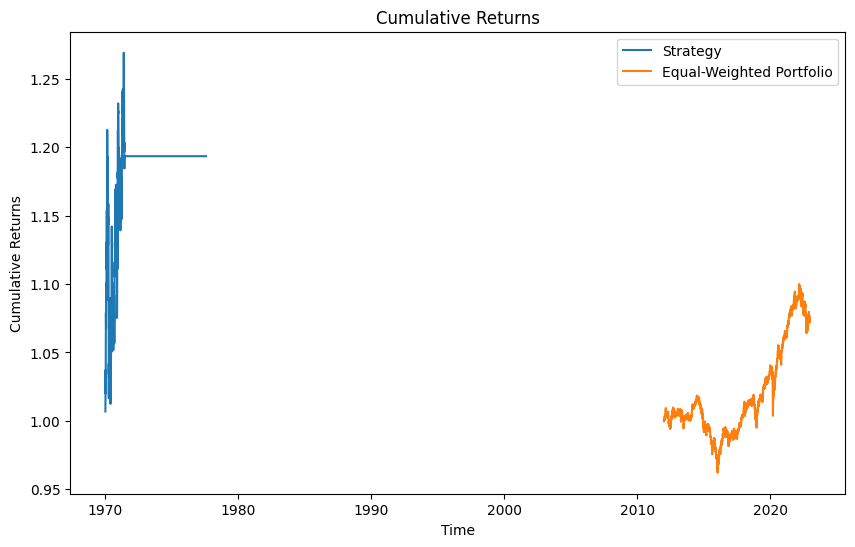

In [31]:
def backtest(positions, returns):
    """
    Backtest strategy using positions and returns.
    """
    # Ensure positions and returns have matching indices and dimensions
    positions = positions[:len(returns), :]  # Trim positions if longer than returns
    portfolio_returns = (positions * returns.values).sum(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    return cumulative_returns


# Backtest the trading strategy
strategy_returns = backtest(positions, returns)

# Equal-weighted portfolio for comparison
equal_weighted_returns = (1 / len(prices.columns)) * returns.mean(axis=1)
cumulative_equal_weighted = (1 + equal_weighted_returns).cumprod()

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(strategy_returns, label="Strategy")
plt.plot(cumulative_equal_weighted, label="Equal-Weighted Portfolio")
plt.title("Cumulative Returns")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()



In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate

# Prepare data for multi-output model
def prepare_multi_output_data(prices, lookback_days, forecast_days):
    """
    Create multi-output dataset from prices for all ETFs.
    """
    # Calculate returns
    returns = prices.pct_change().dropna()

    # Prepare features and labels for multi-output regression
    X, y = [], []
    for i in range(lookback_days, len(returns) - forecast_days):
        # Features: past 'lookback_days' of returns for all ETFs
        X.append(returns.iloc[i - lookback_days:i].values)
        # Labels: average 25-day ahead returns for all ETFs
        y.append(returns.iloc[i:i + forecast_days].mean().values)

    return np.array(X), np.array(y)

# Generate dataset
X, y = prepare_multi_output_data(prices, lookback_days=60, forecast_days=25)

# Split data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Build multi-output LSTM model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_layer = LSTM(50, activation='relu')(input_layer)
output_layer = Dense(y_train.shape[1], activation='linear')(lstm_layer)

multi_output_model = Model(inputs=input_layer, outputs=output_layer)
multi_output_model.compile(optimizer='adam', loss='mse')

# Train the model
multi_output_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0018 - val_loss: 3.6532e-05
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.7951e-05 - val_loss: 2.1877e-05
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.2118e-05 - val_loss: 1.8520e-05
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.0909e-05 - val_loss: 1.7697e-05
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.0417e-05 - val_loss: 1.7631e-05
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.0577e-05 - val_loss: 1.7724e-05
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.0318e-05 - val_loss: 1.5035e-05
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.0871e-05 - val_loss: 1.5353e-05
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.3469e-06 - val_loss: 1.9043e-05
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.4382e-06 - val_loss: 1.4387e-05
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.1151e-06 - 

In [33]:
from sklearn.metrics import mean_squared_error

# In-sample predictions
y_train_pred = multi_output_model.predict(X_train_scaled)
in_sample_mse = mean_squared_error(y_train, y_train_pred)
print(f"In-sample MSE: {in_sample_mse}")


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
In-sample MSE: 6.389021634933126e-06


In [34]:
# Out-of-sample predictions
y_test_pred = multi_output_model.predict(X_test_scaled)
out_of_sample_mse = mean_squared_error(y_test, y_test_pred)
print(f"Out-of-sample MSE: {out_of_sample_mse}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Out-of-sample MSE: 9.480723289788953e-06


In [35]:
len(y_test_pred[0])

5

In [36]:
# Generate positions based on predictions
def multi_output_trading_strategy(y_pred, returns, rebalance_period=25):
    n_periods = len(y_pred) // rebalance_period
    n_assets = y_pred.shape[1]
    positions = np.zeros((len(returns), n_assets))

    for i in range(n_periods):
        start_idx = i * rebalance_period
        end_idx = start_idx + rebalance_period

        # Average predictions over rebalance period
        avg_predictions = np.mean(y_pred[start_idx:end_idx], axis=0)

        # Rank ETFs by predicted returns
        ranked = np.argsort(avg_predictions)
        long_idx, short_idx = ranked[-2:], ranked[:2]  # Top 2 and bottom 2

        # Assign weights for the rebalance period
        for idx in long_idx:
            positions[start_idx:end_idx, idx] = 1 / len(long_idx)  # Long equally
        for idx in short_idx:
            positions[start_idx:end_idx, idx] = -1 / len(short_idx)  # Short equally

    return positions

# Generate positions
positions = multi_output_trading_strategy(y_test_pred, returns)

# Backtest the strategy
strategy_returns = backtest(positions, returns)


In [37]:
# Equal-weighted portfolio returns
equal_weighted_returns = (1 / len(prices.columns)) * returns.mean(axis=1)
cumulative_equal_weighted = (1 + equal_weighted_returns).cumprod()

# Plot backtest results
plt.figure(figsize=(10, 6))
plt.plot(strategy_returns, label="Multi-Output Strategy")
plt.plot(cumulative_equal_weighted, label="Equal-Weighted Portfolio")
plt.title("Cumulative Returns Comparison")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()
